# Question 2: Bayesian Hierarchical Modelling

## EDA

### How do socio-economic characteristics (avg income, education level, unemployment rate) within a region and its local economy impact mobility in 2020 in California?

In [40]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Reading unemployment data and filtering for California

unemployment = pd.read_csv("Unemployment.csv")
ca_unemployment = unemployment[unemployment.State == "CA"]
ca_unemployment = ca_unemployment.drop('State', axis = 1)
ca_unemployment.head()

,FIPS_Code,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,Civilian_labor_force_2001,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
194,6000,California,NaN,NaN,NaN,"16,837,536","16,011,619","825,917",4.9,"17,096,428",...,"19,353,743","18,550,526","803,217",4.2,"18,821,167","16,913,078","1,908,089",10.1,"80,423",100.0
195,6001,"Alameda County, CA",1.0,1.0,1.0,"768,654","741,264","27,390",3.6,"776,398",...,"841,075","815,889","25,186",3.0,"813,807","742,411","71,396",8.8,"107,589",133.8
196,6003,"Alpine County, CA",8.0,4.0,0.0,555,520,35,6.3,573,...,541,512,29,5.4,517,459,58,11.2,"58,112",72.3
197,6005,"Amador County, CA",6.0,4.0,0.0,"15,260","14,477",783,5.1,"16,105",...,"14,801","14,217",584,3.9,"14,424","13,107","1,317",9.1,"62,640",77.9
198,6007,"Butte County, CA",3.0,2.0,1.0,"93,071","87,362","5,709",6.1,"94,972",...,"97,922","92,858","5,064",5.2,"92,604","84,095","8,509",9.2,"58,394",72.6


In [42]:
# Data Cleaning: Removing ", CA" from Area_name so we only have the county name

ca_unemployment['Area_name'] = ca_unemployment['Area_name'].str.replace(', CA', '')
ca_unemployment.head()

,FIPS_Code,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,Civilian_labor_force_2001,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
194,6000,California,NaN,NaN,NaN,"16,837,536","16,011,619","825,917",4.9,"17,096,428",...,"19,353,743","18,550,526","803,217",4.2,"18,821,167","16,913,078","1,908,089",10.1,"80,423",100.0
195,6001,Alameda County,1.0,1.0,1.0,"768,654","741,264","27,390",3.6,"776,398",...,"841,075","815,889","25,186",3.0,"813,807","742,411","71,396",8.8,"107,589",133.8
196,6003,Alpine County,8.0,4.0,0.0,555,520,35,6.3,573,...,541,512,29,5.4,517,459,58,11.2,"58,112",72.3
197,6005,Amador County,6.0,4.0,0.0,"15,260","14,477",783,5.1,"16,105",...,"14,801","14,217",584,3.9,"14,424","13,107","1,317",9.1,"62,640",77.9
198,6007,Butte County,3.0,2.0,1.0,"93,071","87,362","5,709",6.1,"94,972",...,"97,922","92,858","5,064",5.2,"92,604","84,095","8,509",9.2,"58,394",72.6


In [43]:
# Data Cleaning: Removing the first row because it gives state totals, selecting relevant columns

ca_unemployment = ca_unemployment.iloc[1:, :]
ca_unemployment = ca_unemployment[['Area_name', 'Unemployment_rate_2020']]
ca_unemployment.head()

,Area_name,Unemployment_rate_2020
195,Alameda County,8.8
196,Alpine County,11.2
197,Amador County,9.1
198,Butte County,9.2
199,Calaveras County,7.6


In [44]:
# Reading eduction data and filtering for California

education = pd.read_csv("Education.csv")
ca_education = education[education.State == "CA"]
ca_education = ca_education.drop('State', axis = 1)
ca_education = ca_education.rename(columns = {'Area name': 'Area_name', 'FIPS Code': 'FIPS_Code'})
ca_education.head()

,FIPS_Code,Area_name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
198,6000,California,NaN,NaN,NaN,NaN,"4,062,367","3,566,578","1,784,772","1,462,266",...,30.0,26.6,"4,418,675","5,423,462","7,648,680","8,980,726",16.7,20.5,28.9,33.9
199,6001,Alameda County,1.0,1.0,1.0,1.0,"217,589","197,371","87,675","86,038",...,28.4,34.9,"135,524","205,980","275,053","556,105",11.6,17.6,23.5,47.4
200,6003,Alpine County,8.0,4.0,8.0,4.0,101,98,57,8,...,34.1,28.2,68,216,220,266,8.8,28.1,28.6,34.5
201,6005,Amador County,6.0,4.0,6.0,4.0,"2,911","2,314","1,214",593,...,37.1,16.6,"3,024","8,322","13,112","5,837",10.0,27.5,43.3,19.3
202,6007,Butte County,3.0,2.0,3.0,2.0,"24,482","17,743","8,511","6,299",...,36.1,21.8,"15,864","33,186","58,310","40,149",10.8,22.5,39.5,27.2


In [45]:
# Data Cleaning: Removing the first row because it gives state totals, selecting relevant columns

ca_education = ca_education.iloc[1:, :]
ca_education = ca_education[['Area_name', 'Percent of adults with less than a high school diploma, 2015-19',
       'Percent of adults with a high school diploma only, 2015-19',
       "Percent of adults completing some college or associate's degree, 2015-19",
       "Percent of adults with a bachelor's degree or higher, 2015-19"]]
ca_education.head()

,Area_name,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
199,Alameda County,11.6,17.6,23.5,47.4
200,Alpine County,8.8,28.1,28.6,34.5
201,Amador County,10.0,27.5,43.3,19.3
202,Butte County,10.8,22.5,39.5,27.2
203,Calaveras County,9.8,28.0,43.9,18.3


In [46]:
# Reading mobility data and dropping irrelevent columns

ca_mobility = pd.read_csv('2020_US_Region_Mobility_Report.csv')
# mob_2021 = pd.read_csv('2021_US_Region_Mobility_Report.csv')
# ca_mobility = pd.concat([mob_2020, mob_2021], ignore_index = True)
ca_mobility = ca_mobility[ca_mobility.sub_region_1 == "California"]
ca_mobility = ca_mobility.drop(['sub_region_1', 'iso_3166_2_code', 
                                'country_region_code', 'country_region', 'metro_area', 'place_id',
                               'date', 'census_fips_code'], axis = 1)
ca_mobility = ca_mobility.dropna(subset = ['sub_region_2'])
ca_mobility = ca_mobility.rename(columns = {'sub_region_2': 'Area_name'})
ca_mobility.head()

,Area_name,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
48386,Alameda County,1.0,0.0,22.0,1.0,0.0,-1.0
48387,Alameda County,7.0,0.0,24.0,5.0,1.0,-2.0
48388,Alameda County,13.0,1.0,55.0,-31.0,-53.0,11.0
48389,Alameda County,-2.0,3.0,21.0,3.0,0.0,0.0
48390,Alameda County,-1.0,0.0,14.0,1.0,0.0,0.0


In [47]:
# aggregate data by mean per county

ca_mobility = ca_mobility.groupby(['Area_name']).agg('mean').reset_index()
ca_mobility.head()

,Area_name,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Alameda County,-39.236760,-13.825545,7.137072,-55.978193,-42.258567,17.267913
1,Amador County,-8.594502,2.236301,-51.666667,NaN,-25.195946,6.164835
2,Butte County,-20.691589,-0.205607,5.324324,-22.807018,-24.404984,7.127726
3,Calaveras County,-24.667808,14.345794,3.207547,NaN,-21.709459,6.175532
4,Colusa County,-9.664062,1.745098,NaN,-12.716216,-22.456081,NaN


Text(0, 0.5, 'Unemployment Rate (%)')

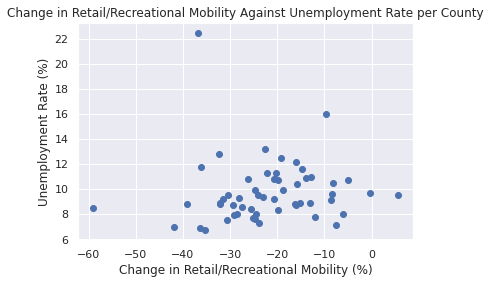

In [48]:
# plot unemployment rate and mobility
umemp_mob_merged = ca_mobility.set_index(['Area_name']).join(
    ca_unemployment.set_index(['Area_name']))

plt.scatter(umemp_mob_merged['retail_and_recreation_percent_change_from_baseline'], umemp_mob_merged['Unemployment_rate_2020'])
plt.title('Change in Retail/Recreational Mobility Against Unemployment Rate per County')
plt.xlabel('Change in Retail/Recreational Mobility (%)')
plt.ylabel('Unemployment Rate (%)')

Text(0, 0.5, 'Unemployment Rate (%)')

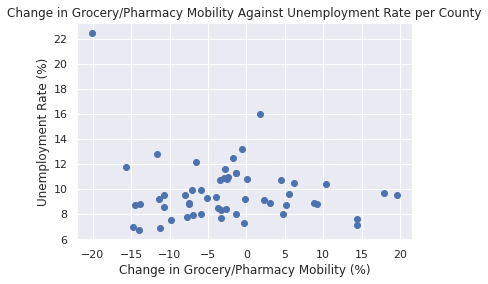

In [49]:
plt.scatter(umemp_mob_merged['grocery_and_pharmacy_percent_change_from_baseline'], umemp_mob_merged['Unemployment_rate_2020'])
plt.title('Change in Grocery/Pharmacy Mobility Against Unemployment Rate per County')
plt.xlabel('Change in Grocery/Pharmacy Mobility (%)')
plt.ylabel('Unemployment Rate (%)')

Text(0, 0.5, 'Unemployment Rate (%)')

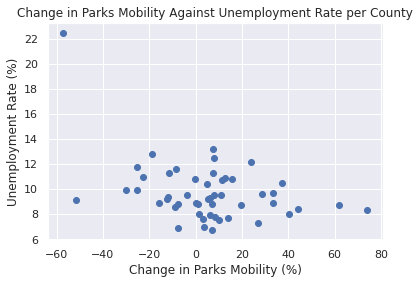

In [50]:
plt.scatter(umemp_mob_merged['parks_percent_change_from_baseline'], umemp_mob_merged['Unemployment_rate_2020'])
plt.title('Change in Parks Mobility Against Unemployment Rate per County')
plt.xlabel('Change in Parks Mobility (%)')
plt.ylabel('Unemployment Rate (%)')

Text(0, 0.5, 'Unemployment Rate (%)')

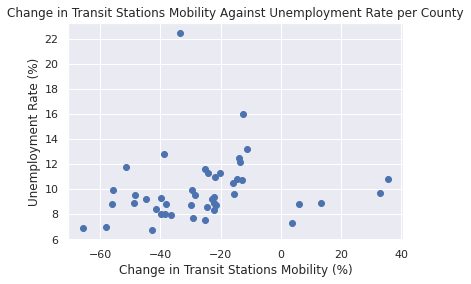

In [51]:
plt.scatter(umemp_mob_merged['transit_stations_percent_change_from_baseline'], umemp_mob_merged['Unemployment_rate_2020'])
plt.title('Change in Transit Stations Mobility Against Unemployment Rate per County')
plt.xlabel('Change in Transit Stations Mobility (%)')
plt.ylabel('Unemployment Rate (%)')

Text(0, 0.5, 'Unemployment Rate (%)')

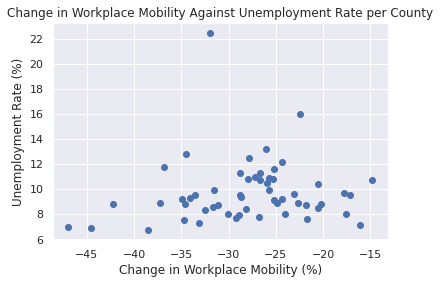

In [52]:
plt.scatter(umemp_mob_merged['workplaces_percent_change_from_baseline'], umemp_mob_merged['Unemployment_rate_2020'])
plt.title('Change in Workplace Mobility Against Unemployment Rate per County')
plt.xlabel('Change in Workplace Mobility (%)')
plt.ylabel('Unemployment Rate (%)')

Text(0, 0.5, 'Unemployment Rate (%)')

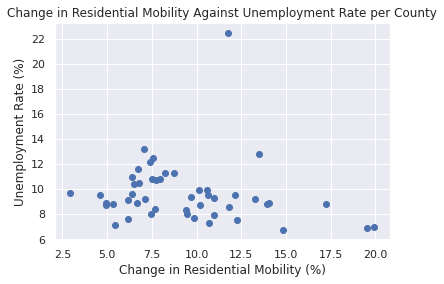

In [53]:
plt.scatter(umemp_mob_merged['residential_percent_change_from_baseline'], umemp_mob_merged['Unemployment_rate_2020'])
plt.title('Change in Residential Mobility Against Unemployment Rate per County')
plt.xlabel('Change in Residential Mobility (%)')
plt.ylabel('Unemployment Rate (%)')

In [54]:
monthly_transportation = pd.read_csv("Monthly_Transportation_Statistics.csv")
monthly_transportation.head()

,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,0,01/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,03/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,04/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,05/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
gdp_q1 = pd.read_csv("gdp_q1.csv")
gdp_q1.head()

,GeoFips,GeoName,LineCode,Description,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,6001,"Alameda, CA",1.0,All industry total,90033250,92823595,97203584,102651288,109296260,119856797,126100394,133468782,140288623,146210749
1,6001,"Alameda, CA",2.0,Private industries,78573841,81202788,85397594,90059076,95788185,105483309,110996390,118193746,124521937,129851568
2,6001,"Alameda, CA",3.0,"Agriculture, forestry, fishing and hunting",(D),(D),88095,86671,89948,95076,92398,107973,84100,94540
3,6001,"Alameda, CA",6.0,"Mining, quarrying, and oil and gas extraction",36944,46066,48343,45274,57618,46688,65231,86291,56210,46265
4,6001,"Alameda, CA",10.0,Utilities,253021,267866,273903,472311,553615,660796,439558,463549,534421,538374


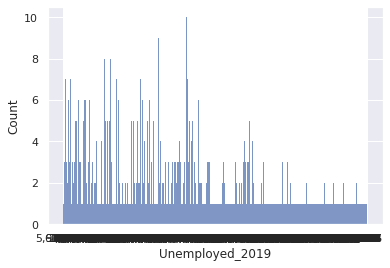

In [56]:
# Import the pandas library
import pandas as pd
import matplotlib.pyplot as plt

# Import the data from the web
df = pd.read_csv("https://raw.githubusercontent.com/pkargupta/mobo102/main/Unemployment.csv",
                   dtype={"fips": str})

                   # Check the distribution of the variable with seaborn:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=df, x="Unemployed_2019")
plt.show();

In [57]:
# Load the county boundary coordinates
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/pkargupta/mobo102/main/gdp_q1.csv') as response:
    counties = json.load(response)

# Build the choropleth
import plotly.express as px
fig = px.choropleth(df, 
    geojson=counties, 
    locations='GeoName', 
    color='Unemployed_2019',
    color_continuous_scale="Viridis",
    range_color=(0, 12),
    scope="name",
    labels={'Unemployed_2019':'unemployment rate'}
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Improve the legend
fig.update_layout(coloraxis_colorbar=dict(
    thicknessmode="pixels", thickness=10,
    lenmode="pixels", len=150,
    yanchor="top", y=0.8,
    ticks="outside", ticksuffix=" %",
    dtick=5
))

fig.show()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)